EDA- Uber Challenge

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


1. Loading and inspect your data

In [2]:
#loading data
df = pd.read_csv("train.csv")
df.head()

,EventId,Occurrence Local Date Time,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,CAMERA,Accident,With A Fixed Object,Closed,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,Law Enforcement,Accident,Multi Vehicle,Closed,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,CAMERA,Stationary Vehicle,Vehicle On Shoulder,Closed,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,CAMERA,Accident,Multi Vehicle,Closed,18.8371319682,-34.087051,8LOVJZ3


In [3]:
#inspection
df.shape

(53845, 9)

In [4]:
df.columns

Index(['EventId', 'Occurrence Local Date Time', 'Reporting Agency', 'Cause',
       'Subcause', 'Status', 'longitude', 'latitude', 'road_segment_id'],
      dtype='object')

In [5]:
df.describe()

,EventId,latitude
count,53845.000000,53845.000000
mean,106497.340403,-33.947960
std,27960.354177,0.511146
min,60558.000000,-34.153087
25%,83043.000000,-33.993621
50%,107083.000000,-33.950250
75%,131294.000000,-33.916789
max,152149.000000,18.839681


In [6]:
df.apply('nunique')

EventId                       53845
Occurrence Local Date Time    50499
Reporting Agency                224
Cause                            24
Subcause                         58
Status                            4
longitude                     49132
latitude                      48947
road_segment_id                 549
dtype: int64

2. Clean the data 

In [7]:
df.Status.unique()

array(['Closed', 'Single Vehicle', 'Any', 'Vehicle On Shoulder'],
      dtype=object)

In [8]:
#Remove reportig agency column as it does not help our search
#Remove Status as every status = closed
df = df.drop(['Reporting Agency'],axis=1)

In [9]:
df = df.drop(['Status'], axis=1)

In [10]:
df.head()

,EventId,Occurrence Local Date Time,Cause,Subcause,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,Stationary Vehicle,Vehicle On Shoulder,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,Accident,With A Fixed Object,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,Accident,Multi Vehicle,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,Stationary Vehicle,Vehicle On Shoulder,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,Accident,Multi Vehicle,18.8371319682,-34.087051,8LOVJZ3


In [11]:
#remove duplicates

print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(53845, 7)
(0, 7)


In [12]:
# Conclusion: no duplicates

In [30]:
#check data types
df.dtypes

EventId                                int64
Occurrence Local Date Time    datetime64[ns]
Cause                                 object
Subcause                              object
longitude                            float64
latitude                             float64
road_segment_id                       object
dtype: object

In [53]:
# turn Occurrence Local Date Time into datetime and longitude into float
df['Occurrence Local Date Time'] = df['Occurrence Local Date Time'].astype('datetime64')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['longitude'] = df['longitude'].astype('float64')
df.dtypes

EventId                                int64
Occurrence Local Date Time    datetime64[ns]
Cause                                 object
Subcause                              object
longitude                            float64
latitude                             float64
road_segment_id                       object
dtype: object

In [56]:
#missing values
print(df.isnull().sum())

EventId                       0
Occurrence Local Date Time    0
Cause                         0
Subcause                      0
longitude                     5
latitude                      0
road_segment_id               0
dtype: int64


In [47]:
df['longitude'].dtype
df["longitude"] = df.longitude.fillna('missing')

In [64]:
#Conclusion= 5 missing values for longitude

In [55]:
#Looking for and dealing with outliers 
print(df.latitude.describe())
print(df.longitude.describe())

count    53845.000000
mean       -33.947960
std          0.511146
min        -34.153087
25%        -33.993621
50%        -33.950250
75%        -33.916789
max         18.839681
Name: latitude, dtype: float64
count    53840.000000
mean        18.604685
std          0.113499
min         18.424719
25%         18.523640
50%         18.600709
75%         18.656355
max         19.149927
Name: longitude, dtype: float64


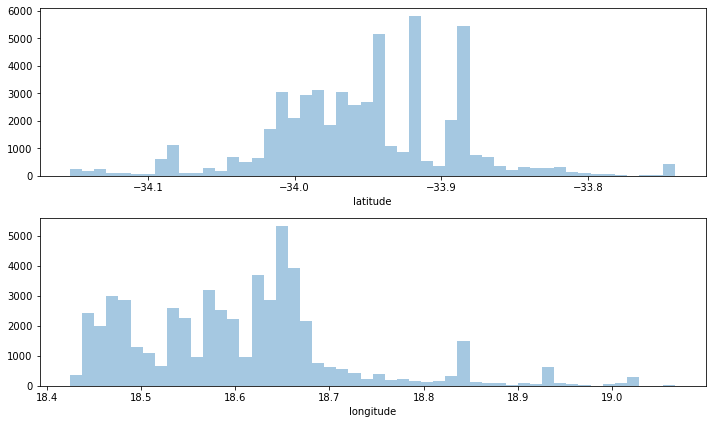

In [81]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,1,1)
sns.distplot(df['latitude'], kde=False)

ax2 = fig.add_subplot(2,1,2)
sns.distplot(df['longitude'], kde=False)

fig.tight_layout()

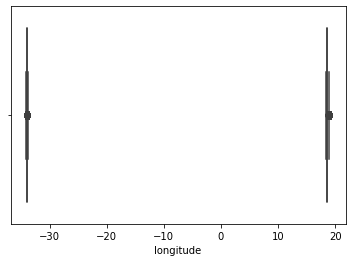

In [72]:
sns.boxplot(df['latitude'])
sns.boxplot(df['longitude'])

In [70]:
df.latitude.unique()

array([-33.88827471, -34.14085678, -33.95915443, ..., -33.97097752,
       -33.94919373, -33.88828251])

In [69]:
df = df[df.latitude<-30]
df['latitude'].unique()

array([-33.88827471, -34.14085678, -33.95915443, ..., -33.97097752,
       -33.94919373, -33.88828251])

In [71]:
df.longitude.unique()

array([18.5408955 , 18.93075632, 18.5533575 , ..., 18.57659467,
       18.65857565, 18.6250798 ])

In [73]:
df = df[df.longitude<19.1]
df['longitude'].unique()

array([18.5408955 , 18.93075632, 18.5533575 , ..., 18.57659467,
       18.65857565, 18.6250798 ])

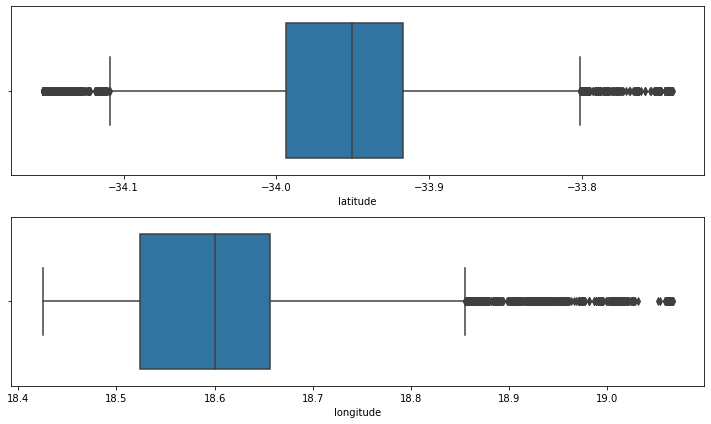

In [80]:
#new boxplot
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,1,1)
sns.boxplot(df['latitude'])

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(df['longitude'])

fig.tight_layout()

Assessing categorical variables 

In [76]:
#remind yourself of data types
df.dtypes

EventId                                int64
Occurrence Local Date Time    datetime64[ns]
Cause                                 object
Subcause                              object
longitude                            float64
latitude                             float64
road_segment_id                       object
dtype: object

In [77]:
from ipywidgets import interact, fixed

In [78]:
def categorical_variable_distribution(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()

In [82]:
categorical_columns = df.select_dtypes(
    ['object']).columns.tolist()

In [83]:
interact(categorical_variable_distribution, col=categorical_columns)

interactive(children=(Dropdown(description='col', options=('Cause', 'Subcause', 'road_segment_id'), value='Cau…

<function __main__.categorical_variable_distribution(col)>

   **Recap**  

   We've looked at duplicates, missing values, outliers, etc.

   Now, let's look into:
        1. Comparisons and aggregations
            a. multiple group counts
            b. categorical variable means
            c. correlations
            d. pandas profiling

In [90]:
# multiple group counts 

In [84]:
# just to refresh what our dataset looks like
df.head()

,EventId,Occurrence Local Date Time,Cause,Subcause,longitude,latitude,road_segment_id
0,60558,2016-01-01 00:53:00,Stationary Vehicle,Vehicle On Shoulder,18.540896,-33.888275,S0B3CGQ
1,60559,2016-01-01 00:54:00,Accident,With A Fixed Object,18.930756,-34.140857,RYJYAPI
2,60560,2016-01-01 02:26:00,Accident,Multi Vehicle,18.553358,-33.959154,U3KP57C
3,60561,2016-01-01 02:56:00,Stationary Vehicle,Vehicle On Shoulder,18.677556,-33.895258,RY0TRQ8
4,60562,2016-01-01 03:40:00,Accident,Multi Vehicle,18.837132,-34.087051,8LOVJZ3


In [98]:
?df.pivot_table

In [104]:
def pivot_count(df, rows, columns): # this just makes a function that does a pivotcount for us with different variables.
    df_pivot = df.pivot_table(values="EventId", # could be any column, since we are just counting rows 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [108]:
cause_sub_cause = pivot_count(df, "Cause", "Subcause")
cause_sub_cause

Subcause,Animal,Any,Arrestor Bed,Bomb Threat/Terrorist/Shooting,Building Fire,Bumper Bash,Bus,Cash-In-Transit Heist,Debris,Dense Fog/Mist,...,Travel Lane,Vehicle,Vehicle Fire,Vehicle On Fire,Vehicle On Shoulder,Vehicles On Shoulder,Veld Fire,With A Fixed Object,With A Pedestrian,With An Animal
Cause,,,,,,,,,,,,,,,,,,,,,
Accident,NaN,NaN,NaN,NaN,NaN,317.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,58.0,108.0,14.0
Arrestor,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concerts/Other,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Congestion,NaN,7874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash,NaN,NaN,NaN,NaN,NaN,212.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,26.0,107.0,9.0
Field Device Maintenance,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.0,NaN,NaN,NaN,166.0,NaN,NaN,NaN
Fire & Smoke,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,31.0,NaN,NaN,NaN
HAZMAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
cause_road_segment = pivot_count(df, "Cause","road_segment_id")
cause_road_segment

road_segment_id,03RHJ3G,044ZYVD,086LLYS,0B0QOEN,0F3OY57,0FF63NM,0GZ5KS3,0ICKV72,0OH5J23,0PU7VDI,...,Z2OSI9E,Z4HC8K2,Z4VBV3L,ZAVM3PJ,ZCX0S5O,ZFMKTPH,ZL4WLO2,ZP9STNM,ZQJNJPJ,ZT6MOAL
Cause,,,,,,,,,,,,,,,,,,,,,
Accident,28.0,9.0,NaN,17.0,2.0,NaN,10.0,2.0,1.0,NaN,...,26.0,6.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,4.0
Arrestor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concerts/Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Congestion,1.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash,44.0,7.0,2.0,12.0,1.0,NaN,1.0,5.0,1.0,1.0,...,20.0,4.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,2.0
Field Device Maintenance,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN
Fire & Smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HAZMAT,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <font color='#34ebba'> SOME PLOTS </font>

In [133]:
import matplotlib.style as style
style.use('fivethirtyeight')

/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


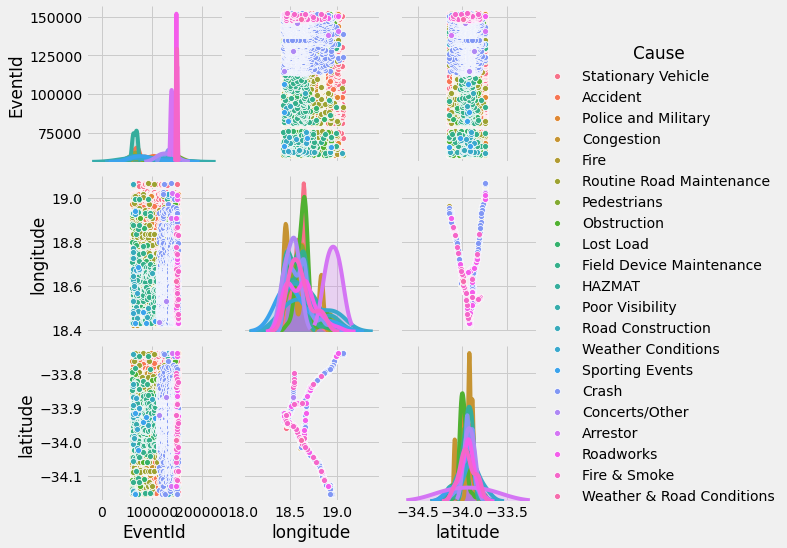

In [131]:
pp = sns.pairplot(df, hue="Cause")

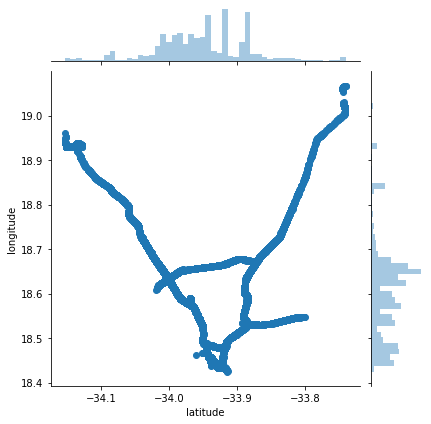

In [122]:
jp = sns.jointplot("latitude", "longitude", data=df)
    # note, does the shape look like a rough map of Cape Town?

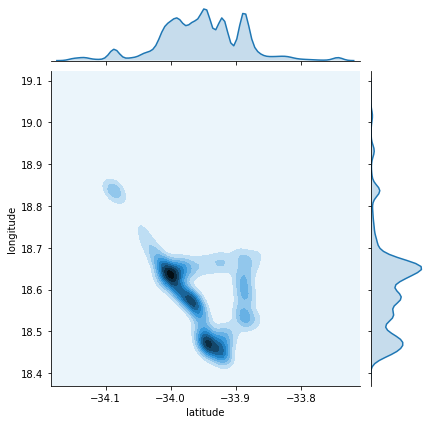

In [128]:
jp = sns.jointplot("latitude", "longitude", data=df, kind='kde')

In [ ]:
# categorical variable means
    # the groupby bar plots are not loading, will look into why that is

In [ ]:
# interact and widgets

In [149]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

categorical_variables = df.select_dtypes(
    ['object', 'category']).columns.tolist()

numerical_variables = df.select_dtypes(include=np.number) # different way of doing the above. 
#There is almnost always more than 1 way to skin a code

def means_by_category(col_group, col_calc):
    df.groupby(col_group)[col_calc].mean().nlargest(10).plot(kind='barh', figsize=(10,10))
    sns.mpl.pyplot.xlabel('Mean values for variable {}'.format(col_calc))

interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('Cause', 'Subcause', 'road_segment_id'), valu…

In [174]:
# correlations
    # can use pairplot or regplot for easy visualization of correlation
    # however, the lack of numeric variables in our dataset may be an issue

In [165]:
sns.regplot?

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

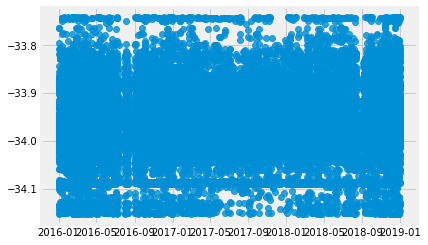

In [167]:
sns.regplot(x="Occurrence Local Date Time", y="latitude", data=df, scatter=True);

In [168]:
# no correlation over time with regards to latitude and longitude (location)

/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/katman/opt/anaconda3/envs/condaenvironment/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must h

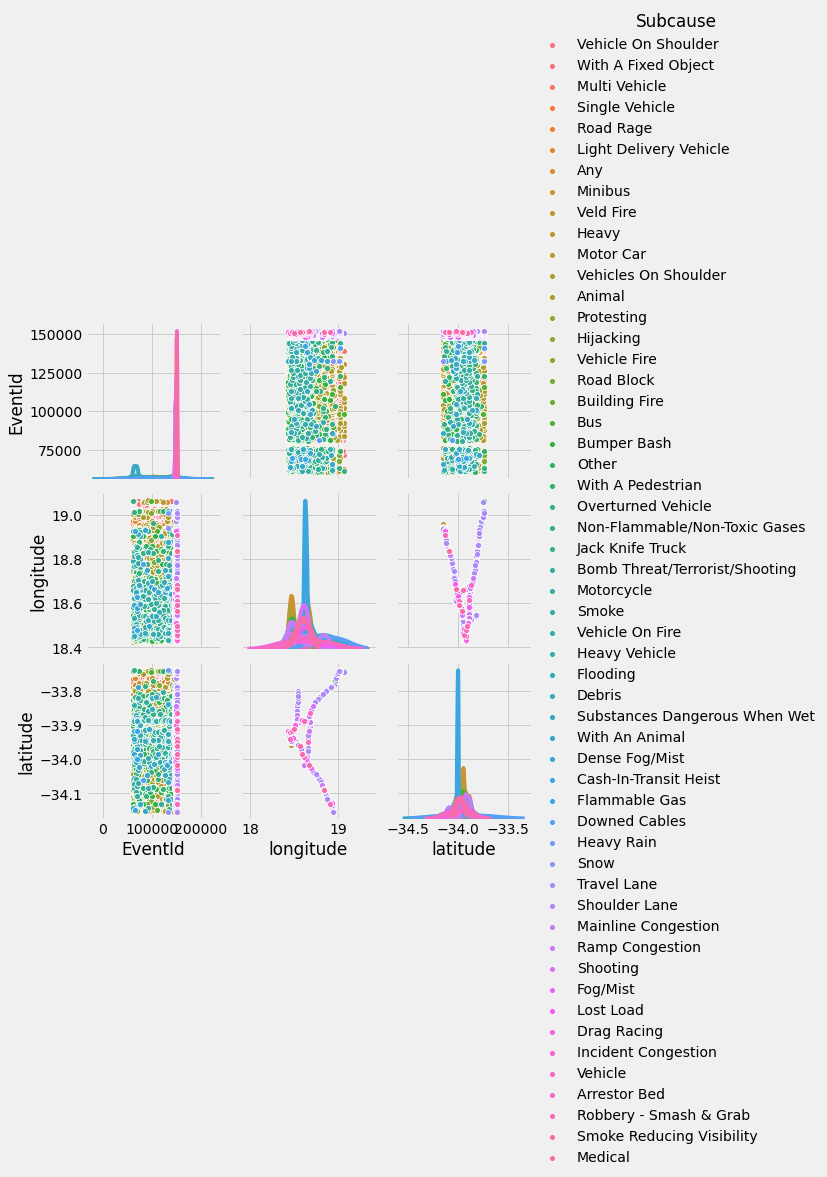

In [173]:
style.use('fivethirtyeight')
pp2 = sns.pairplot(df, hue="Subcause")

In [170]:
# next: pandas profiling